# Import libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load your cleaned data
df = pd.read_csv("./Data/clean_website_wata.csv")
df

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,4,3.429316,0.003910,social,8.478174,0,0.01
1,4,1.621052,0.003980,organic,9.636170,2,0.01
2,5,3.629279,0.001805,organic,2.071925,3,0.01
3,5,4.235843,0.002915,paid,1.960654,5,0.01
4,3,4.541868,0.004207,social,3.438712,2,0.01
...,...,...,...,...,...,...,...
1883,9,3.577507,0.003522,paid,4.128122,3,0.01
1884,1,2.724513,0.002072,referral,1.324206,2,0.01
1885,3,0.392856,0.000956,organic,3.824416,1,0.01
1886,3,0.393319,0.002783,paid,5.037584,2,0.01


# 1. RFM-like Segmentation (Recency, Frequency, Engagement) - Adjusted to your data.

In [3]:
# Assuming you don't have true recency, we'll use 'Previous Visits' as a proxy for frequency, and 'Session Duration' and 'Page Views' for engagement.

# Scale numerical features
numerical_features = ['Previous Visits', 'Session Duration', 'Page Views']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_features])
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features)

In [4]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose number of clusters
df['RFM_Segment'] = kmeans.fit_predict(scaled_df)

c:\Users\lualg\anaconda3\envs\streamlit_pycaret\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
# Analyze segments
print(df.groupby('RFM_Segment')[numerical_features].mean())

             Previous Visits  Session Duration  Page Views
RFM_Segment                                               
0                   1.810474          5.902721    4.743142
1                   2.858995          1.700399    6.862237
2                   1.445977          1.466002    3.709195


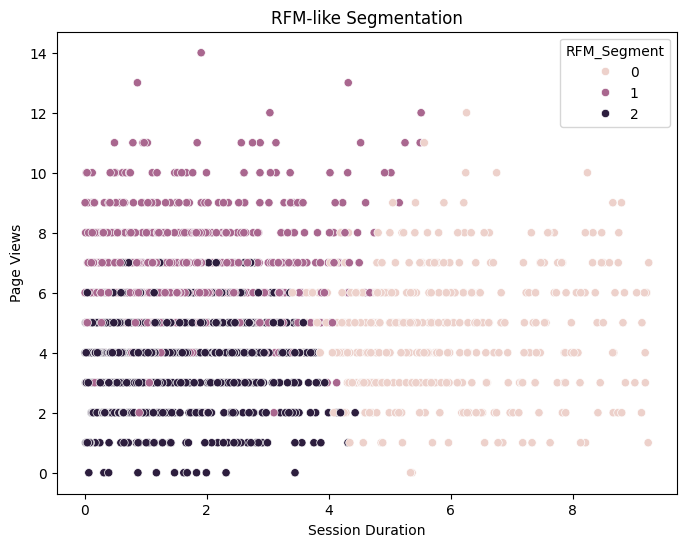

<Figure size 640x480 with 0 Axes>

In [6]:
# Visualize segments (example: scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Session Duration', y='Page Views', hue='RFM_Segment', data=df)
plt.title('RFM-like Segmentation')
plt.show()

# Save the figure
plt.savefig("./Segmentation_Graphs/RFM_likes.png")  # Saves as PNG (default)

# 2. Segmentation Based on Conversion Behavior

In [7]:
df['Converted'] = (df['Conversion Rate'] > 0).astype(int) #creates a binary column, based on if there was any conversion.

In [8]:
converted_users = df[df['Converted'] == 1]
non_converted_users = df[df['Converted'] == 0]

In [9]:
print("\nConverted Users Mean:")
print(converted_users[numerical_features].mean())


Converted Users Mean:
Previous Visits     1.985169
Session Duration    2.484936
Page Views          4.959216
dtype: float64


In [10]:
print("\nNon-Converted Users Mean:")
print(non_converted_users[numerical_features].mean())


Non-Converted Users Mean:
Previous Visits    NaN
Session Duration   NaN
Page Views         NaN
dtype: float64


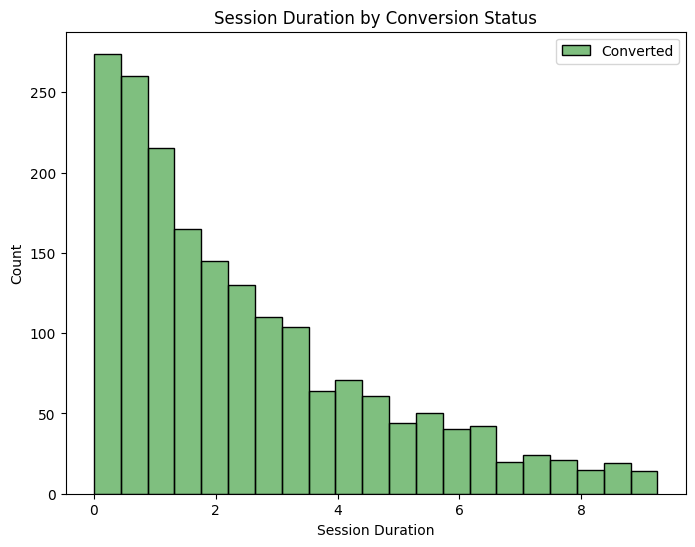

<Figure size 640x480 with 0 Axes>

In [11]:
# Visualization of conversion segments.
plt.figure(figsize=(8,6))
sns.histplot(converted_users['Session Duration'], color = 'green', label = 'Converted', alpha = 0.5)
sns.histplot(non_converted_users['Session Duration'], color = 'red', label = 'Non-Converted', alpha = 0.5)
plt.title("Session Duration by Conversion Status")
plt.legend()
plt.show()

# Save the figure
plt.savefig("./Segmentation_Graphs/Session_Duration.png")  # Saves as PNG (default)

# 3. Segmentation Based on Time on Page

In [12]:
median_time_on_page = df['Time on Page'].median()
df['Time_on_Page_Segment'] = ['High' if x > median_time_on_page else 'Low' for x in df['Time on Page']]

In [13]:
high_time_users = df[df['Time_on_Page_Segment'] == 'High']
low_time_users = df[df['Time_on_Page_Segment'] == 'Low']

In [14]:
print("\nHigh Time on Page Users Mean:")
print(high_time_users[numerical_features].mean())


High Time on Page Users Mean:
Previous Visits     1.936441
Session Duration    2.511224
Page Views          4.993644
dtype: float64


In [15]:
print("\nLow Time on Page Users Mean:")
print(low_time_users[numerical_features].mean())


Low Time on Page Users Mean:
Previous Visits     2.033898
Session Duration    2.458648
Page Views          4.924788
dtype: float64


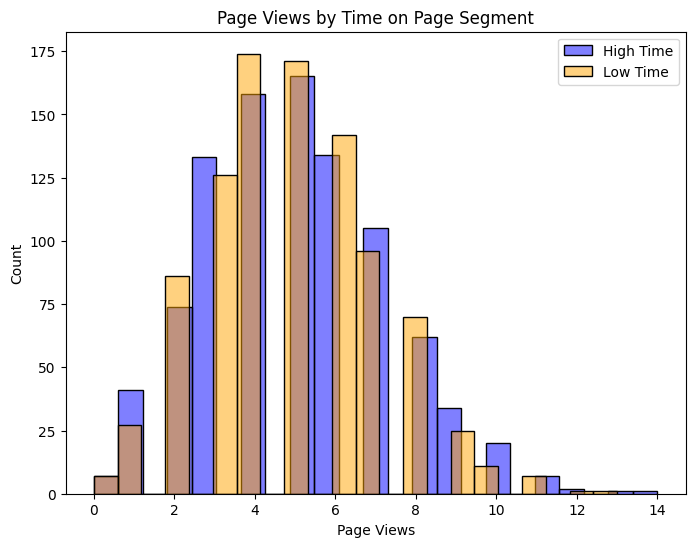

<Figure size 640x480 with 0 Axes>

In [16]:
#Visualization of Time on page segmentation.
plt.figure(figsize=(8,6))
sns.histplot(high_time_users['Page Views'], color = 'blue', label = 'High Time', alpha = 0.5)
sns.histplot(low_time_users['Page Views'], color = 'orange', label = 'Low Time', alpha = 0.5)
plt.title("Page Views by Time on Page Segment")
plt.legend()
plt.show()

# Save the figure
plt.savefig("./Segmentation_Graphs/Page_views.png")  # Saves as PNG (default)